<hr size="8" color="blue">
<p style="text-align: center;"><span style="color: #0000ff;"><font size="+15"><strong> Simulations
 </strong> </font></span> </p>
<hr size="8" color="blue">

https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

# Import des libraires

In [102]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

# 1. Définition des paramètres du signal

## a) Fréquence d'échantillonnage


In [2]:
FREQ=5*60
FREQ

300

Il y a N point et l'intervalle entre chaque point est de T

T correspond à la fréquence freq 

In [112]:
#Notre base de travail, que nous appelons période, est une journée


PeriodeRef=3600*24 #seconde
Te=5*60 # seconde
#Nombre de points sur 5 jour
Ne= 5*int(PeriodeRef/Te)
Ne

1440

In [114]:
T=PeriodeRef/(Te*3)
T

96.0

## b) Index de temps

In [115]:
time=np.arange(start=0.0,stop=Ne*T,step=T)
time.shape

(1440,)

In [116]:
dates=pd.date_range(start='1/1/2018 23:10', periods=Ne, freq='5min')

In [117]:
duration=dates[1]-dates[0]


days, seconds = duration.days, duration.seconds

In [118]:
hours = days * 24 + seconds // 3600
minutes = (seconds % 3600) // 60
seconds = seconds % 60
print(days)
print(hours)
print(minutes)
print(seconds)

0
0
5
0


# 2) La saisonnalités du signal

On veut qu'il y ai trois cycle par jour, ce qui fait un total de 15 cycles sur 5 jours

In [10]:
CycleParPeriode=3


In [11]:
Fr=CycleParPeriode/PeriodeRef
Fr

3.472222222222222e-05

https://zestedesavoir.com/tutoriels/2451/les-signaux-sinusoidaux-en-physique/dephasage-et-retard/

In [13]:
Delay=4081#s
phase=Delay*(2*np.pi*Fr)
PeriodeRef=3600*24 #seconde
CycleParPeriode=3
Te=5*60 # seconde
Ne= 5*int(PeriodeRef/Te)
time=np.arange(Ne*Te,step=Te)
Fr=CycleParPeriode/PeriodeRef
print(Fr)
phase=np.pi-0.02
seasonality=np.sin(Fr*2*np.pi*time+phase)
#plt.plot(time,seasonality)
dt=Ne/time.shape[0]*Te
TT=int(1/(Fr*dt))#
print(phase)

3.472222222222222e-05
3.121592653589793


In [14]:
import numpy as np
import pylab as pl

In [15]:
from scipy import signal
import pandas as pd
dfs = pd.DataFrame(seasonality[:, np.newaxis])
dfs.index = dates
dfs.plot()
#dfs[0:int(Periode/(3*5*60))+1].plot()
plt.grid()

In [16]:
Fe=1/Te

f, Pxx_den = signal.periodogram(dfs.values[:,0],Fe)
plt.plot(f,Pxx_den)
plt.xlim([0,0.0001])
plt.scatter([Fr],[0])

reel : 3.122

Rest : 1.551
Div : 0
Estimation brutes 1.551

Estimation affiner: 3.122
Ecart : -1.7763568394002505e-15
14308.326752779067


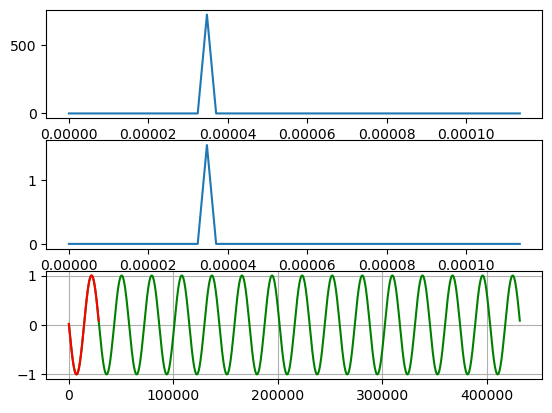

In [17]:
amp = np.fft.rfft(seasonality)#+np.pi/2
freqs = np.fft.rfftfreq(time.shape[-1],dt)
mag=np.abs(amp)
#mag=np.sqrt(amp.real**2+amp.imag**2)
pha=np.angle(amp)
#pha=np.arctan2(amp.imag,amp.real)
#pha[abs(mag)<1]=0
print('reel : '+str(np.around(phase,3))+'\n')
#PHA=max(abs(pha))
IndFR=np.argmax(mag)
Pe=np.pi
PHA=pha[IndFR]
PhaMod=PHA%Pe
PhaDiv=int(PHA//Pe)
print("Rest : "+str(np.around(PhaMod,3)))
print("Div : "+str(PhaDiv))
print('Estimation brutes '+str(np.around(PHA,3))+'\n')
#print(PHA>np.pi/2)
'''if((PHA>np.pi+0.001) or (PHA<0)):
    print(">")
    PHA=PHA+np.pi'''
PHA=PhaMod+PhaDiv*np.pi+np.pi/2
#print (PHA)
print('Estimation affiner: '+str(np.around(PHA,3)))
print('Ecart : '+str(PHA-phase))
M=max(mag)
phaPlot=pha
phaPlot[np.abs(mag) < M-1] = 0
DelayEst=phase/(2*np.pi*Fr)
print(DelayEst)
pl.subplot(311)
pl.plot(freqs[:50],mag[:50])
pl.subplot(312)
pl.plot(freqs[:50],phaPlot[:50])
pl.subplot(313)
pl.plot(time, seasonality,'g')
pl.plot(time[:TT], seasonality[:TT],'r')
pl.grid()
pl.show()

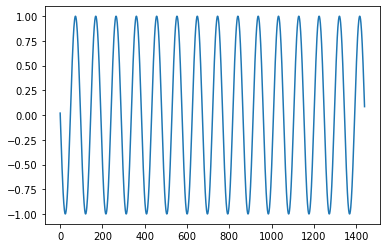

In [132]:
plt.plot(seasonality)

In [133]:
TT

96

# Test

In [123]:
Fr=CycleParPeriode/(24*3600)
Fr

3.472222222222222e-05

phase = np.pi / 24
phase

In [124]:
periode=60#24*3600#max(2.0*np.pi*x)
phase=periode/3#*(3600*24)
phase=20/(24*3600)
phase

0.0002314814814814815

<AxesSubplot:>

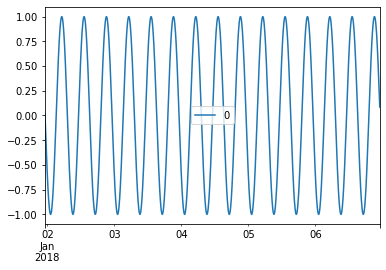

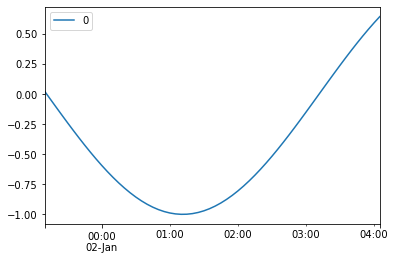

In [125]:
from scipy import signal
import pandas as pd
dfs = pd.DataFrame(seasonality[:, np.newaxis])
dfs.index = dates
dfs.plot()
dfs[0:60].plot()

# Fin

In [126]:
dfSta = pd.DataFrame(s
[:, np.newaxis])

NameError: name 's' is not defined

In [23]:
dfS=pd.DataFrame(seasonality[:,np.newaxis])
dfS.index = dates
dfS.plot()
#dfs[0:int(Periode/(3*5*60))+1].plot()
plt.grid()
dfS.to_csv('SimulatedSta.csv')

In [24]:
Cor=np.correlate(seasonalityRef, seasonality,"full")

NC=Cor.shape[0]
NC

plt.plot(time[:2*20],Cor[int(NC/2):int(NC/2)+2*20],'r')

NameError: name 'seasonalityRef' is not defined

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

phase = np.pi / 4
print(phase)
t = np.linspace(0, 10, num=200, endpoint=False)
y = np.cos(2 * np.pi * t + phase)

0.7853981633974483


In [26]:
seasonalityPeriode=seasonality[0:int(T)]

In [27]:
plt.plot(time[0:int(T)],seasonalityPeriode)
plt.grid()

In [28]:
Overtime=np.arange(Ne*Te,step=Te/100)


In [29]:
seasonalityI=np.interp(Overtime,time, seasonality)

In [30]:
plt.plot(seasonalityI)
plt.grid()

In [31]:
from scipy import signal 
hamming = signal.hamming(seasonalityI.shape[0])

In [32]:
seasonalityI=seasonalityI*hamming

https://stackoverflow.com/questions/54454723/scipy-fft-how-to-get-phase-angle/54466750

In [33]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [34]:
find_nearest(xfr,Fr)

NameError: name 'xfr' is not defined

# Processus stationnaire

In [35]:
from statsmodels.tsa.arima.model import ARIMA

In [36]:
Ns=seasonality.shape[0]
Ns

1440

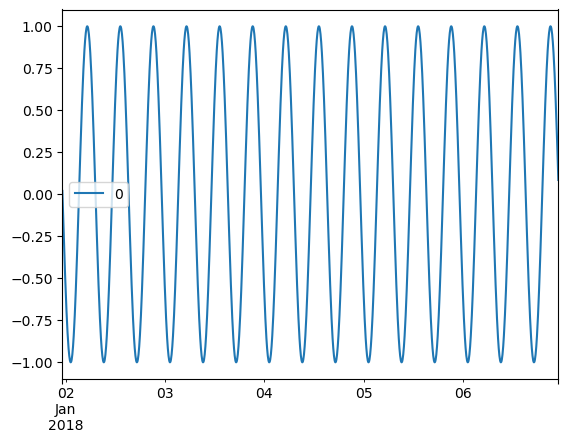

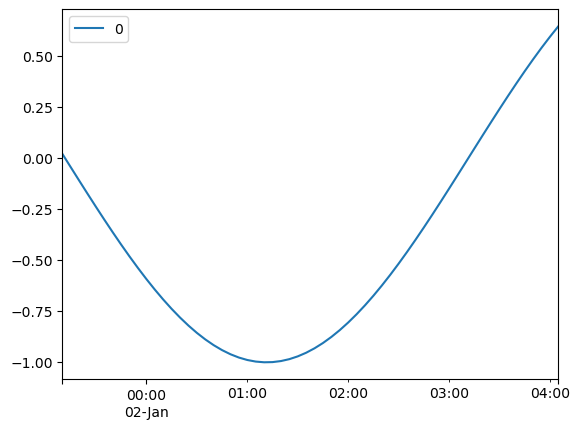

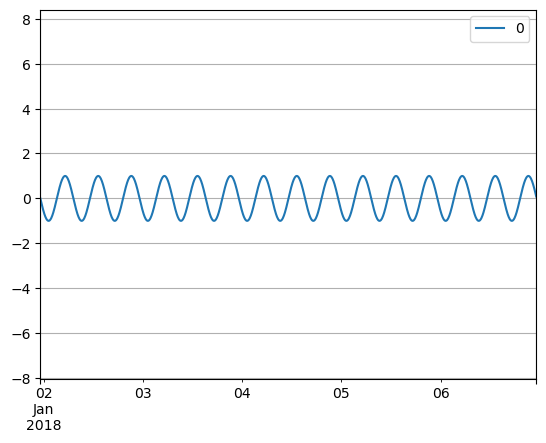

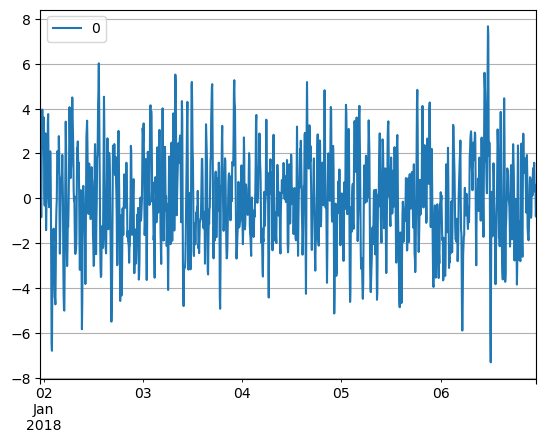

In [40]:
import numpy as np
np.random.seed(12345)
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
y = sm.tsa.arma_generate_sample(ar, ma,Ns)
plt.plot(y)
plt.show()


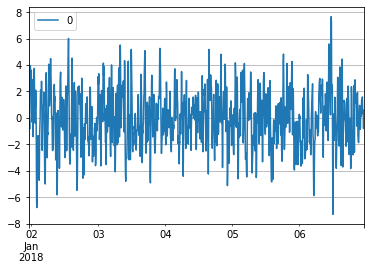

In [105]:
%matplotlib inline
dfSta = pd.DataFrame(y[:, np.newaxis])
dfSta.index = dates
dfSta.plot()
#dfs[0:int(Periode/(3*5*60))+1].plot()
plt.grid()
dfSta.to_csv('SimulatedStationnaire.csv')

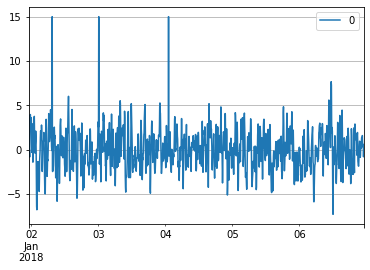

In [110]:
%matplotlib inline
dfOutlier = pd.DataFrame(y[:, np.newaxis])
dfOutlier.iloc[+600,0]=15
dfOutlier.index = dates
dfOutlier.plot()
plt.grid()
dfOutlier.to_csv('SimulatedOutlier.csv')

In [111]:
dfOutlier

,0
2018-01-01 23:10:00,-0.204708
2018-01-01 23:15:00,0.192353
2018-01-01 23:20:00,-0.084332
2018-01-01 23:25:00,-0.837072
2018-01-01 23:30:00,0.816031
...,...
2018-01-06 22:45:00,0.310997
2018-01-06 22:50:00,0.602746
2018-01-06 22:55:00,0.333001
2018-01-06 23:00:00,-0.806774


In [83]:
dfARMA = pd.DataFrame(y[:, np.newaxis])
dfARMA.index = dates
dfARMA.plot()
#dfs[0:int(Periode/(3*5*60))+1].plot()
plt.grid()
dfARMA.to_csv('SimulatedARMA.csv')

# Tendance

In [84]:
trend=0.00002*time+3
#seasonality=4 + 2 * np.sin(200 * x)
plt.plot(trend)

Fréquence neterme de minutes

In [85]:
Data=trend+seasonality+0.3*y

In [86]:
DataSea=seasonality+0.3*y

In [87]:
dfSea = pd.DataFrame(DataSea[:, np.newaxis])
dfSea.index = dates
dfSea.plot()
#dfs[0:int(Periode/(3*5*60))+1].plot()
plt.grid()

In [88]:
dfSea.to_csv('SimulatedSeasonality.csv')

In [89]:
DataTrend=trend+0.3*y

In [101]:
dfTrend = pd.DataFrame(DataTrend[:, np.newaxis])
dfTrend.index = dates
dfTrend.plot()

<AxesSubplot:>

In [100]:
#dfs[0:int(Periode/(3*5*60))+1].plot()
plt.grid()

In [99]:
dfTrend.to_csv('SimulatedTrend.csv')

In [91]:
dfD = pd.DataFrame(Data[:, np.newaxis])
dfD.index = dates
dfD.plot()
#dfs[0:int(Periode/(3*5*60))+1].plot()
plt.grid()
dfD.to_csv('SimulatedTrendSaisonality.csv')

In [92]:
DataRelation=trend+seasonality+0.3*y

In [98]:
dfD = pd.DataFrame(2*Data[:, np.newaxis])
dfD.index = dates
dfD.plot()
#dfs[0:int(Periode/(3*5*60))+1].plot()
plt.grid()
dfD.to_csv('SimulatedTrendSaisonalityRelation.csv')

In [95]:

import pandas as pd
df = pd.DataFrame(Data[:, np.newaxis])
#df.index = dates2

In [96]:
dfD.plot()

/home/ggassier/.conda/envs/GerinatEnvConda/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<AxesSubplot:>

Ajout aléatoire de nan

In [62]:
for col in df.columns:
    df.loc[df.sample(frac=0.1).index, col] = np.nan

Ajout de valeur erroné

In [63]:
import string
import random

def GenString():
    length_of_string = 8
    return(''.join(random.SystemRandom().choice(string.ascii_letters + string.digits) for _ in range(length_of_string)))
GenString()

'apWz3WwV'

In [64]:
for col in df.columns:
    df.loc[df.sample(frac=0.01).index, col] = GenString()

A interpoler

In [65]:
df=df.interpolate(method='linear')
df.plot()

TypeError: Cannot interpolate with all object-dtype columns in the DataFrame. Try setting at least one column to a numeric dtype.

In [66]:
df

,0
0,2.958586
1,3.018272
2,2.876028
3,2.591441
4,3.029359
...,...
1435,12.043611
1436,12.074908
1437,11.936566
1438,NaN


In [67]:
df.to_csv('Simulated.csv')

In [68]:
model = ARIMA(y, order=(2,0,2))
model_fit = model.fit()

In [69]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1440
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -2020.084
Date:                Mon, 06 Feb 2023   AIC                           4052.168
Time:                        16:20:44   BIC                           4083.802
Sample:                             0   HQIC                          4063.977
                               - 1440                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0451      0.104     -0.435      0.664      -0.248       0.158
ar.L1          0.6583      0.063     10.480      0.000       0.535       0.781
ar.L2         -0.1999      0.050     -3.961      0.000      -0.299      -0.101
ma.L1          0.7389      0.059     12.593      0.000       0.624       0.854
ma.L2          0.4094      0.041      9.987      0.000       0.329       0.490
sigma2         0.9669      0.035     27.662      0.000       0.898       1.035
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.45
Prob(Q):                              1.00   Prob(JB):                         0.04
Heteroskedasticity (H):               0.95   Skew:                             0.14
Prob(H) (two-sided):                  0.60   Kurtosis:                         3.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Lien

In [70]:
dd=df.values[:,0]
dd.shape

(1440,)

In [71]:
Data2=4*dd+2
plt.plot(Data2)
Data2

TypeError: can only concatenate str (not "int") to str

In [72]:
import warnings
z = np.polyfit(dd,Data2,1)
z

NameError: name 'Data2' is not defined

In [73]:
p = np.poly1d(z)
plt.plot(time,p(time))

NameError: name 'z' is not defined

# Cycle

In [74]:
Cycle=np.sin(Fr*2*np.pi*time+phase)+np.sin(3/2*Fr*2*np.pi*time+phase)

In [75]:
plt.plot(Cycle)

In [76]:
Cor=np.correlate(Cycle,Cycle,"full")

NC=Cor.shape[0]

In [77]:
plt.plot(time,Cor[NN-1:],'r')

NameError: name 'NN' is not defined

In [78]:
time.shape

(1440,)

Ajout d'une composante cyclique 

In [79]:
NN=int(NC/2)+1